## Analyse der bereinigten Daten 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Daten laden und filtern

drogen = pd.read_csv('../../Data/processed/wasser_cleaning/alle_staedte.csv', sep=';')

berichte = pd.read_csv("../../statistik/prozentuale_aenderung_blaulicht_drogen_tf-idf.csv", sep=";", decimal=",")
berichte = berichte[berichte['Jahr'] >= 2020]   # Filterung ab 2020, da die Datenlage davor unzureichend ist

In [4]:
# descriptive Statistik

drogen = drogen.set_index('Year')
print(drogen.describe().round(2))

       Chemnitz  Dortmund  Erfurt  Munich G  Nuremberg  Saarbrücken (2)
count      5.00      5.00    5.00      5.00       5.00             5.00
mean     317.94    432.99  382.55    286.91     205.00           221.34
std      127.91    100.37  129.66     88.30      62.80            46.82
min      103.20    305.04  193.70    200.63     130.55           167.51
25%      306.62    352.89  304.72    241.11     161.80           195.67
50%      356.29    478.59  453.56    250.51     194.27           209.10
75%      404.10    480.76  454.46    315.82     266.79           246.52
max      419.48    547.65  506.30    426.50     271.59           287.88


In [6]:
# Abweichungen jeder Stadt um den gesamten Durchschnitt

stadt_mean = drogen.mean()
gesamt_mean = stadt_mean.mean()

print(f"Stadt\t\tMittelwert\tAbweichung\tStatus")
print("-" * 70) 


for city, mean in stadt_mean.items():
    diff = mean - gesamt_mean
    
    if mean > gesamt_mean:
        status = "Über Schnitt" 
    else:
        status= "Unter Schnitt"

    print(f"{city}\t{mean:.2f}\t\t{diff:+.2f}\t\t{status}")

Stadt		Mittelwert	Abweichung	Status
----------------------------------------------------------------------
Chemnitz	317.94		+10.15		Über Schnitt
Dortmund	432.99		+125.20		Über Schnitt
Erfurt	382.55		+74.76		Über Schnitt
Munich G	286.91		-20.87		Unter Schnitt
Nuremberg	205.00		-102.79		Unter Schnitt
Saarbrücken (2)	221.34		-86.45		Unter Schnitt


# Vergleich des Drogenkonsums in den Städten 

> Grafik erstellt mit:  [Datawrapper](https://www.datawrapper.de/).

### Erkenntnisse


* **Der "Corona-Knick" (2021)**
    In mehreren Städten ist im Jahr 2021 ein deutlicher Einbruch der Konsumwerte zu sehen. Dieser Rückgang könnte auf die öffentlichen Einschränkungen zur Eindämmung der COVID-19-Pandemie zurückzuführen sein.

* **Allgemeiner Aufwärtstrend**
    Abgesehen von dem temporären Einbruch zeigt sich ein allgemeiner Anstieg des Drogenkonsums über die Jahre.
    * *Ausnahme:* Lediglich **Erfurt** weicht von diesem Muster ab und zeigt einen geringen Rückgang.

### Grenzen der Interpretation

Trotz dieser sichtbaren Muster ist eine tiefergehende Ursachenforschung problematisch, da kaum weitere Datenquellen zur Verfügung stehen

![0aqHR-miligramm-pro-1000-einwohner-innen-nbsp- (1).png](<attachment:0aqHR-miligramm-pro-1000-einwohner-innen-nbsp- (1).png>)

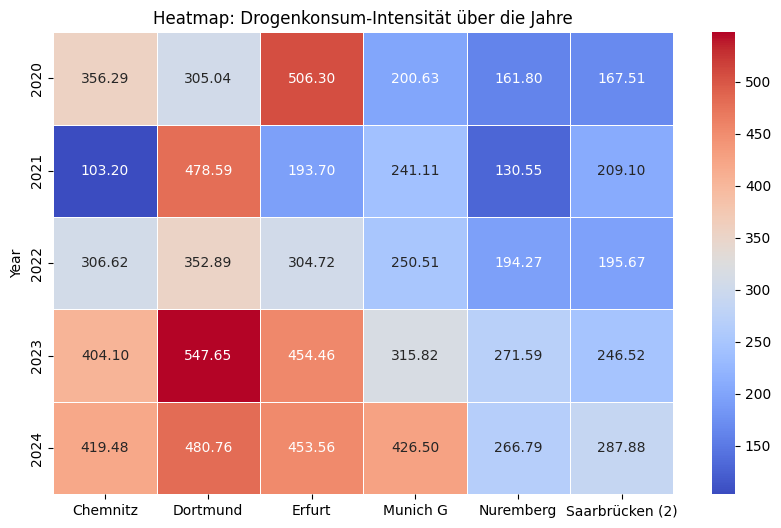

In [153]:
# Heatmap für den weiteren Vergleich 

plt.figure(figsize=(10, 6))
sns.heatmap(drogen, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Heatmap: Drogenkonsum-Intensität über die Jahre")
plt.show()

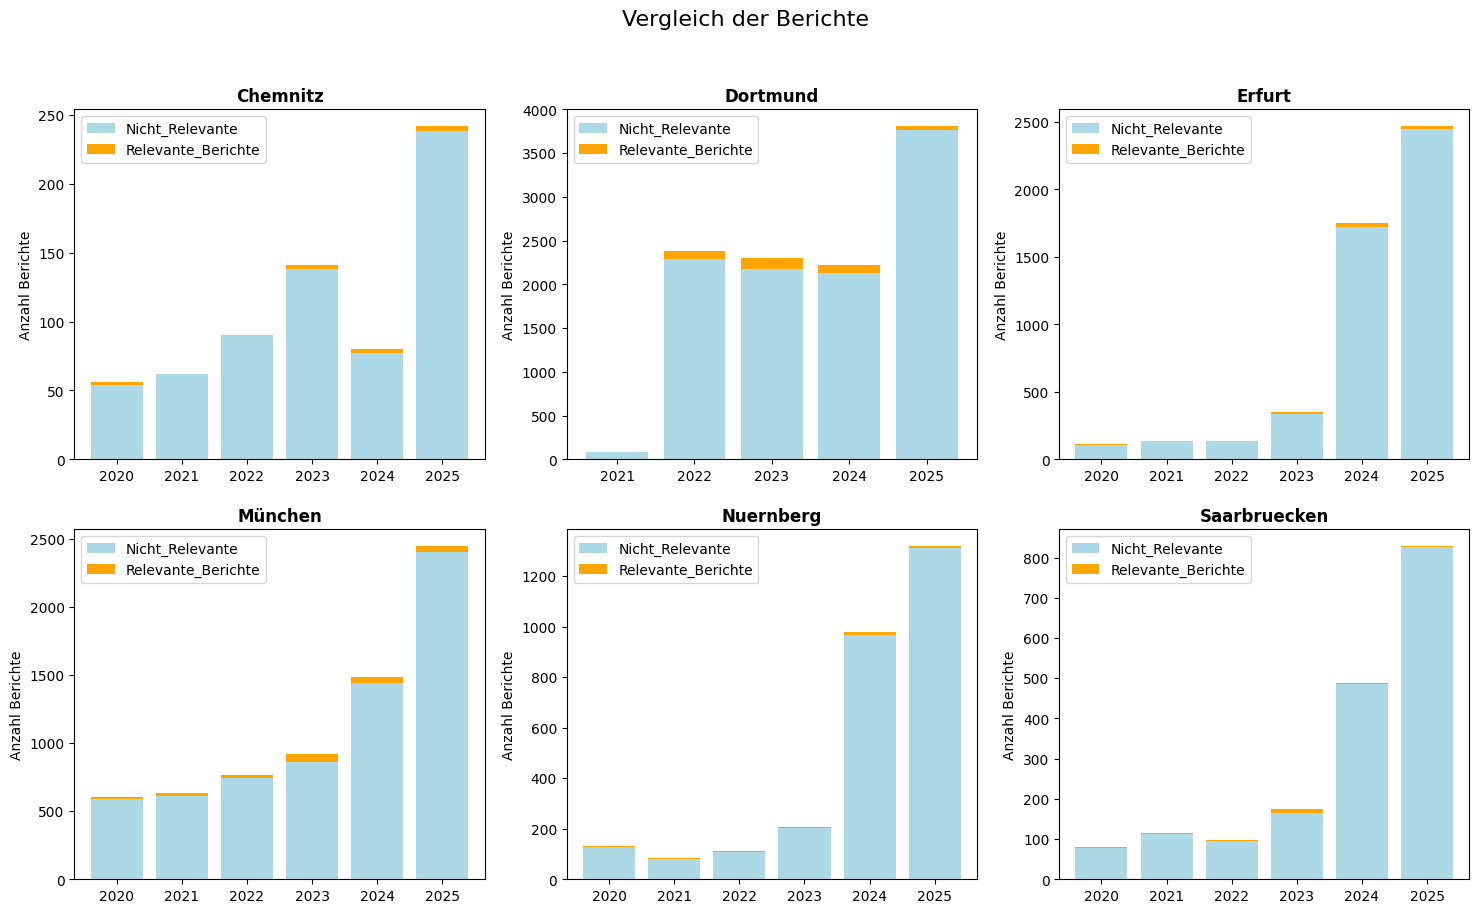

In [7]:
# gestapeltes Balkendiagramm über die Verteilung der relevanten und nicht relevanten Berichte der Städte

berichte['Nicht_Relevante'] = berichte['Gesamt_Berichte'] - berichte['Relevante_Berichte']


# Diagramme zusammenfügen 
stadte = berichte['Stadt'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes_flat = axes.flatten()


for i, stadt in enumerate(stadte):
    ax = axes_flat[i]
    
    subset = berichte[berichte['Stadt'] == stadt].set_index('Jahr')
    plot_data = subset[['Nicht_Relevante', 'Relevante_Berichte']]
    
    plot_data.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'], width=0.8, rot=0)
    

    ax.set_title(stadt, fontweight='bold', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Anzahl Berichte')
    



plt.suptitle('Vergleich der Berichte ', fontsize=16)
plt.show()
